# Create 2D annotation visualization from one video

In [42]:
from ai_badminton.pose import read_player_poses
from ai_badminton.court import read_court, court_points_to_corners, Court
from ai_badminton.trajectory import Trajectory
from ai_badminton.video_annotator import annotate_video
from ai_badminton.hit_detector import read_hits

import cv2

import numpy as np
from pathlib import Path

dataset_root = "/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset"
match_name = "test_match3"

video_stems = [v.stem for v in (Path(dataset_root) / match_name / "rally_video").glob("*.mp4")]

for stem in video_stems:
    print(f"creating 2D annotation for video {match_name}/{stem}")
    prefix_template = dataset_root + f"/{match_name}" + f"/%s/{stem}"

    poses = read_player_poses(prefix_template %("poses"))

    court_pts = read_court((prefix_template %("court")) + ".out")
    court = Court(corners = court_points_to_corners(court_pts))

    trajectory = Trajectory((prefix_template %("ball_trajectory")) + "_ball.csv")

    hits_path = Path((prefix_template %("shot")) + "_hit.csv")
    hits = read_hits(hits_path)
    result = hits["frames"]
    is_hit = hits["player_ids"]

    video_file = (prefix_template %("rally_video")) + ".mp4"
    cap = cv2.VideoCapture(video_file)
    assert cap.isOpened(), f"Cannot open video {video_file}"
    
    outfile = Path((prefix_template %("annotated_2d")) + ".mp4")
    if not outfile.parent.is_dir():
        outfile.parent.mkdir(exist_ok=True, parents=True)
        
    annotate_video(cap, court, poses, trajectory, result=result, is_hit=is_hit, outfile=str(outfile))

creating 2D annotation for video test_match3/1_06_05


  0%|          | 0/246 [00:00<?, ?it/s]

creating 2D annotation for video test_match3/1_08_08


  0%|          | 0/288 [00:00<?, ?it/s]

creating 2D annotation for video test_match3/1_09_15


  0%|          | 0/247 [00:00<?, ?it/s]

creating 2D annotation for video test_match3/1_08_09


  0%|          | 0/230 [00:00<?, ?it/s]

creating 2D annotation for video test_match3/1_05_03


  0%|          | 0/214 [00:00<?, ?it/s]

creating 2D annotation for video test_match3/1_10_16


  0%|          | 0/349 [00:00<?, ?it/s]

creating 2D annotation for video test_match3/1_03_02


  0%|          | 0/466 [00:00<?, ?it/s]

creating 2D annotation for video test_match3/1_06_06


  0%|          | 0/341 [00:00<?, ?it/s]

creating 2D annotation for video test_match3/1_05_02


  0%|          | 0/779 [00:00<?, ?it/s]

creating 2D annotation for video test_match3/1_02_00


  0%|          | 0/707 [00:00<?, ?it/s]

# Create annotation visualization from all video with 3d trajectory

In [6]:
from ai_badminton.pose import read_player_poses
from ai_badminton.court import read_court, court_points_to_corners, Court
from ai_badminton.trajectory import Trajectory, read_trajectory_3d
from ai_badminton.video_annotator import annotate_video_3d
from ai_badminton.hit_detector import read_hits
from ai_badminton.pipeline_clean import read_poses_court_trajectory

import cv2

import numpy as np
from pathlib import Path

#for match_idx in range(1, 23):
for match_idx in range(1,4):
    print(match_idx)
    #FIXME debug START
    if match_idx != 3:
        continue
    #FIXME debug END
    match_path = Path(f"/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/test_match{match_idx}")

    rally_videos = (match_path / "rally_video").glob("*.mp4")
    video_names = [p.stem for p in rally_videos]

    for video_name in video_names:

        video_path = match_path / "rally_video" / (video_name + ".mp4")

        cap = cv2.VideoCapture(str(video_path))
        assert cap.isOpened()

        trajectory_3d_path = match_path / "ball_trajectory_3d_bootstraped" / (video_path.stem + "_3d.csv")
        assert trajectory_3d_path.is_file()

        metadata = read_poses_court_trajectory(match_path, video_path.stem)
        output_path = match_path / "annotated_3d" / (video_path.stem + "bootstraped_3d.mp4")
        print(f"Generating {output_path}")
        output_path.parent.mkdir(parents=True, exist_ok=True)
        annotate_video_3d(
            cap,
            metadata["court3d"],
            read_trajectory_3d(trajectory_3d_path),
            outfile = str(output_path)
        )
        print("Done")


1
2
3
Generating /home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/test_match3/annotated_3d/1_06_05bootstraped_3d.mp4
213


  0%|          | 0/213 [00:00<?, ?it/s]

Done
Generating /home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/test_match3/annotated_3d/1_08_08bootstraped_3d.mp4
236


  0%|          | 0/236 [00:00<?, ?it/s]

Done
Generating /home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/test_match3/annotated_3d/1_09_15bootstraped_3d.mp4
198


  0%|          | 0/198 [00:00<?, ?it/s]

Done
Generating /home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/test_match3/annotated_3d/1_08_09bootstraped_3d.mp4
204


  0%|          | 0/204 [00:00<?, ?it/s]

Done
Generating /home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/test_match3/annotated_3d/1_05_03bootstraped_3d.mp4
203


  0%|          | 0/203 [00:00<?, ?it/s]

Done
Generating /home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/test_match3/annotated_3d/1_10_16bootstraped_3d.mp4
312


  0%|          | 0/312 [00:00<?, ?it/s]

Done
Generating /home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/test_match3/annotated_3d/1_03_02bootstraped_3d.mp4
429


  0%|          | 0/429 [00:00<?, ?it/s]

Done
Generating /home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/test_match3/annotated_3d/1_06_06bootstraped_3d.mp4
284


  0%|          | 0/284 [00:00<?, ?it/s]

Done
Generating /home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/test_match3/annotated_3d/1_05_02bootstraped_3d.mp4
717


  0%|          | 0/717 [00:00<?, ?it/s]

Done
Generating /home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/test_match3/annotated_3d/1_02_00bootstraped_3d.mp4
677


  0%|          | 0/677 [00:00<?, ?it/s]

Done


# Create annotation visualization from all videos in a match

In [4]:
from ai_badminton.pose import read_player_poses
from ai_badminton.court import read_court, court_points_to_corners, Court
from ai_badminton.trajectory import Trajectory
from ai_badminton.video_annotator import annotate_video
from ai_badminton.hit_detector import read_hits

import cv2

import numpy as np
from pathlib import Path

def annotate_all_videos(match_path):
    rally_videos = (match_path / "rally_video").glob("*.mp4")
    video_names = [p.stem for p in rally_videos]
    
    for video_name in video_names:
        print(f"Processing video: {video_name}")
        poses = read_player_poses(str(match_path / "poses" / video_name))
        
        court_pts = read_court(str(match_path / "court" / (video_name + ".out")))
        court = Court(corners = court_points_to_corners(court_pts))

        trajectory = Trajectory(str(match_path / "ball_trajectory" / (str(video_name) + "_ball_predict.csv")))

        video_file = str(match_path / "rally_video" / (video_name + ".mp4"))
            
        cap = cv2.VideoCapture(video_file)
        assert cap.isOpened(), f"Cannot open video {video_file}"
        
        out_dir = match_path / "annotated_2d"
        out_dir.mkdir(parents=True, exist_ok=True)
        out_path = out_dir / (video_name + ".mp4")
        annotate_video(cap, court, poses, trajectory, outfile=str(out_path))


In [6]:

dataset_base = Path("/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset")
match_indices = range(0,23)
for match_idx in match_indices:
    match_path = dataset_base / f"match{match_idx}"
    print(f"Processing match: {match_path}")
    annotate_all_videos(match_path)

Processing match: /home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match0
Processing match: /home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match1
Processing video: 1_03_04


  0%|          | 0/138 [00:00<?, ?it/s]

Processing video: 1_06_06


  0%|          | 0/156 [00:00<?, ?it/s]

Processing video: 1_06_08


  0%|          | 0/99 [00:00<?, ?it/s]

Processing video: 1_02_00


  0%|          | 0/498 [00:00<?, ?it/s]

Processing video: 1_03_05


  0%|          | 0/357 [00:00<?, ?it/s]

Processing video: 1_02_01


  0%|          | 0/195 [00:00<?, ?it/s]

Processing video: 1_06_09


  0%|          | 0/453 [00:00<?, ?it/s]

Processing video: 1_02_02


  0%|          | 0/258 [00:00<?, ?it/s]

Processing video: 1_03_06


  0%|          | 0/249 [00:00<?, ?it/s]

Processing video: 1_01_00


  0%|          | 0/651 [00:00<?, ?it/s]

Processing video: 1_02_03


  0%|          | 0/78 [00:00<?, ?it/s]

Processing video: 1_02_04


  0%|          | 0/153 [00:00<?, ?it/s]

Processing match: /home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match2
Processing video: 1_08_12


  0%|          | 0/273 [00:00<?, ?it/s]

Processing video: 1_06_09


  0%|          | 0/474 [00:00<?, ?it/s]

Processing video: 1_06_08


  0%|          | 0/354 [00:00<?, ?it/s]

Processing video: 1_02_03


  0%|          | 0/357 [00:00<?, ?it/s]

Processing video: 1_09_12


  0%|          | 0/459 [00:00<?, ?it/s]

Processing video: 1_04_03


  0%|          | 0/357 [00:00<?, ?it/s]

Processing video: 1_08_11


  0%|          | 0/336 [00:00<?, ?it/s]

Processing video: 1_00_02


  0%|          | 0/609 [00:00<?, ?it/s]

Processing match: /home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match3
Processing video: 2_18_15


  0%|          | 0/1167 [00:00<?, ?it/s]

Processing video: 1_12_17


  0%|          | 0/348 [00:00<?, ?it/s]

Processing video: 2_04_07


  0%|          | 0/636 [00:00<?, ?it/s]

Processing video: 2_10_12


  0%|          | 0/225 [00:00<?, ?it/s]

Processing video: 1_08_10


  0%|          | 0/138 [00:00<?, ?it/s]

Processing video: 1_01_00


  0%|          | 0/453 [00:00<?, ?it/s]

Processing video: 3_11_10


  0%|          | 0/219 [00:00<?, ?it/s]

Processing match: /home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match4
Processing video: 1_03_02


  0%|          | 0/357 [00:00<?, ?it/s]

Processing video: 2_14_17


  0%|          | 0/195 [00:00<?, ?it/s]

Processing video: 3_07_05


  0%|          | 0/165 [00:00<?, ?it/s]

Processing video: 3_02_00


  0%|          | 0/354 [00:00<?, ?it/s]

Processing video: 2_05_07


  0%|          | 0/405 [00:00<?, ?it/s]

Processing video: 3_18_17


  0%|          | 0/555 [00:00<?, ?it/s]

Processing video: 2_02_05


  0%|          | 0/474 [00:00<?, ?it/s]

Processing video: 1_15_10


  0%|          | 0/402 [00:00<?, ?it/s]

Processing match: /home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match5
Processing video: 1_01_01


  0%|          | 0/720 [00:00<?, ?it/s]

Processing video: 2_20_17


  0%|          | 0/717 [00:00<?, ?it/s]

Processing video: 1_21_19


  0%|          | 0/648 [00:00<?, ?it/s]

Processing video: 1_01_02


  0%|          | 0/504 [00:00<?, ?it/s]

Processing video: 2_15_13


  0%|          | 0/540 [00:00<?, ?it/s]

Processing video: 1_19_18


  0%|          | 0/240 [00:00<?, ?it/s]

Processing match: /home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match6
Processing video: 1_19_12


  0%|          | 0/372 [00:00<?, ?it/s]

Processing video: 1_15_06


  0%|          | 0/900 [00:00<?, ?it/s]

Processing video: 1_05_03


  0%|          | 0/1086 [00:00<?, ?it/s]

Processing video: 1_11_04


  0%|          | 0/588 [00:00<?, ?it/s]

Processing video: 1_02_00


  0%|          | 0/528 [00:00<?, ?it/s]

Processing match: /home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match7
Processing video: 2_14_15


  0%|          | 0/492 [00:00<?, ?it/s]

Processing video: 1_12_13


  0%|          | 0/618 [00:00<?, ?it/s]

Processing video: 2_05_03


  0%|          | 0/945 [00:00<?, ?it/s]

Processing video: 1_02_01


  0%|          | 0/648 [00:00<?, ?it/s]

Processing video: 3_08_05


  0%|          | 0/453 [00:00<?, ?it/s]

Processing match: /home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match8
Processing video: 3_17_12


  0%|          | 0/585 [00:00<?, ?it/s]

Processing video: 1_05_13


  0%|          | 0/255 [00:00<?, ?it/s]

Processing video: 3_02_00


  0%|          | 0/87 [00:00<?, ?it/s]

Processing video: 3_21_13


  0%|          | 0/342 [00:00<?, ?it/s]

Processing video: 2_03_06


  0%|          | 0/1032 [00:00<?, ?it/s]

Processing video: 3_15_08


  0%|          | 0/162 [00:00<?, ?it/s]

Processing video: 2_10_12


  0%|          | 0/516 [00:00<?, ?it/s]

Processing video: 1_01_00


  0%|          | 0/366 [00:00<?, ?it/s]

Processing match: /home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match9
Processing video: 1_04_05


  0%|          | 0/246 [00:00<?, ?it/s]

Processing video: 1_07_10


  0%|          | 0/549 [00:00<?, ?it/s]

Processing video: 1_05_06


  0%|          | 0/255 [00:00<?, ?it/s]

Processing video: 1_02_03


  0%|          | 0/303 [00:00<?, ?it/s]

Processing video: 1_07_07


  0%|          | 0/315 [00:00<?, ?it/s]

Processing video: 1_07_11


  0%|          | 0/279 [00:00<?, ?it/s]

Processing video: 1_01_03


  0%|          | 0/831 [00:00<?, ?it/s]

Processing video: 1_07_14


  0%|          | 0/192 [00:00<?, ?it/s]

Processing video: 1_06_06


  0%|          | 0/228 [00:00<?, ?it/s]

Processing match: /home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match10
Processing video: 1_12_16


  0%|          | 0/480 [00:00<?, ?it/s]

Processing video: 2_14_08


  0%|          | 0/750 [00:00<?, ?it/s]

Processing video: 1_03_03


  0%|          | 0/525 [00:00<?, ?it/s]

Processing video: 2_04_02


  0%|          | 0/333 [00:00<?, ?it/s]

Processing video: 1_03_01


  0%|          | 0/579 [00:00<?, ?it/s]

Processing match: /home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match11
Processing video: 1_03_01


  0%|          | 0/561 [00:00<?, ?it/s]

Processing video: 2_05_00


  0%|          | 0/360 [00:00<?, ?it/s]

Processing video: 1_07_06


  0%|          | 0/381 [00:00<?, ?it/s]

Processing video: 2_15_04


  0%|          | 0/696 [00:00<?, ?it/s]

Processing video: 1_13_13


  0%|          | 0/789 [00:00<?, ?it/s]

Processing match: /home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match12
Processing video: 2_01_01


  0%|          | 0/510 [00:00<?, ?it/s]

Processing video: 1_10_12


  0%|          | 0/828 [00:00<?, ?it/s]

Processing video: 1_01_00


  0%|          | 0/693 [00:00<?, ?it/s]

Processing video: 3_03_03


  0%|          | 0/402 [00:00<?, ?it/s]

Processing video: 2_05_14


  0%|          | 0/819 [00:00<?, ?it/s]

Processing match: /home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match13
Processing video: 2_06_05


  0%|          | 0/888 [00:00<?, ?it/s]

Processing video: 2_17_11


  0%|          | 0/477 [00:00<?, ?it/s]

Processing video: 2_09_08


  0%|          | 0/135 [00:00<?, ?it/s]

Processing video: 1_17_15


  0%|          | 0/318 [00:00<?, ?it/s]

Processing video: 2_07_05


  0%|          | 0/213 [00:00<?, ?it/s]

Processing video: 1_09_10


  0%|          | 0/573 [00:00<?, ?it/s]

Processing match: /home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match14
Processing video: 2_19_13


  0%|          | 0/705 [00:00<?, ?it/s]

Processing video: 2_15_10


  0%|          | 0/393 [00:00<?, ?it/s]

Processing video: 2_13_06


  0%|          | 0/621 [00:00<?, ?it/s]

Processing video: 2_21_17


  0%|          | 0/402 [00:00<?, ?it/s]

Processing video: 1_17_14


  0%|          | 0/714 [00:00<?, ?it/s]

Processing match: /home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match15
Processing video: 2_16_12


  0%|          | 0/573 [00:00<?, ?it/s]

Processing video: 1_21_12


  0%|          | 0/312 [00:00<?, ?it/s]

Processing video: 2_19_14


  0%|          | 0/666 [00:00<?, ?it/s]

Processing video: 2_14_08


  0%|          | 0/234 [00:00<?, ?it/s]

Processing video: 2_18_14


  0%|          | 0/885 [00:00<?, ?it/s]

Processing match: /home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match16
Processing video: 1_03_06


  0%|          | 0/594 [00:00<?, ?it/s]

Processing video: 3_17_16


  0%|          | 0/435 [00:00<?, ?it/s]

Processing video: 2_08_08


  0%|          | 0/501 [00:00<?, ?it/s]

Processing video: 3_14_09


  0%|          | 0/342 [00:00<?, ?it/s]

Processing video: 3_12_06


  0%|          | 0/654 [00:00<?, ?it/s]

Processing video: 1_13_20


  0%|          | 0/438 [00:00<?, ?it/s]

Processing match: /home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match17
Processing video: 1_02_02


  0%|          | 0/372 [00:00<?, ?it/s]

Processing video: 2_01_01


  0%|          | 0/531 [00:00<?, ?it/s]

Processing video: 2_15_11


  0%|          | 0/468 [00:00<?, ?it/s]

Processing video: 2_18_11


  0%|          | 0/501 [00:00<?, ?it/s]

Processing video: 2_08_05


  0%|          | 0/525 [00:00<?, ?it/s]

Processing video: 1_15_13


  0%|          | 0/531 [00:00<?, ?it/s]

Processing match: /home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match18
Processing video: 3_12_14


  0%|          | 0/405 [00:00<?, ?it/s]

Processing video: 1_06_12


  0%|          | 0/363 [00:00<?, ?it/s]

Processing video: 3_20_19


  0%|          | 0/405 [00:00<?, ?it/s]

Processing video: 2_02_02


  0%|          | 0/435 [00:00<?, ?it/s]

Processing video: 3_16_17


  0%|          | 0/387 [00:00<?, ?it/s]

Processing video: 3_03_05


  0%|          | 0/687 [00:00<?, ?it/s]

Processing match: /home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match19
Processing video: 1_07_08


  0%|          | 0/456 [00:00<?, ?it/s]

Processing video: 1_01_01


  0%|          | 0/459 [00:00<?, ?it/s]

Processing video: 2_14_08


  0%|          | 0/462 [00:00<?, ?it/s]

Processing video: 2_12_06


  0%|          | 0/549 [00:00<?, ?it/s]

Processing video: 1_01_03


  0%|          | 0/897 [00:00<?, ?it/s]

Processing match: /home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match20
Processing video: 2_00_01


  0%|          | 0/327 [00:00<?, ?it/s]

Processing video: 2_19_14


  0%|          | 0/495 [00:00<?, ?it/s]

Processing video: 1_09_05


  0%|          | 0/669 [00:00<?, ?it/s]

Processing video: 2_07_08


  0%|          | 0/417 [00:00<?, ?it/s]

Processing video: 2_05_08


  0%|          | 0/756 [00:00<?, ?it/s]

Processing video: 1_11_10


  0%|          | 0/492 [00:00<?, ?it/s]

Processing match: /home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match21
Processing video: 2_04_04


  0%|          | 0/324 [00:00<?, ?it/s]

Processing video: 2_02_03


  0%|          | 0/384 [00:00<?, ?it/s]

Processing video: 2_09_08


  0%|          | 0/567 [00:00<?, ?it/s]

Processing video: 2_12_08


  0%|          | 0/303 [00:00<?, ?it/s]

Processing video: 1_02_01


  0%|          | 0/357 [00:00<?, ?it/s]

Processing video: 1_16_17


  0%|          | 0/552 [00:00<?, ?it/s]

Processing video: 1_19_19


  0%|          | 0/183 [00:00<?, ?it/s]

Processing match: /home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match22
Processing video: 1_02_01


  0%|          | 0/951 [00:00<?, ?it/s]

Processing video: 3_15_13


  0%|          | 0/432 [00:00<?, ?it/s]

Processing video: 1_07_02


  0%|          | 0/426 [00:00<?, ?it/s]

Processing video: 2_18_18


  0%|          | 0/549 [00:00<?, ?it/s]

Processing video: 2_17_18


  0%|          | 0/645 [00:00<?, ?it/s]

# Visualize the inferenced hits versus ground truth

In [1]:
%matplotlib widget

import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd

In [2]:
def plot_shot_differences(hit_groundtruth_path):
    gt_path = hit_groundtruth_path
    pred_path = Path(str(gt_path.with_suffix("")) + "_predict.csv")
    assert gt_path.is_file() and pred_path.is_file()
    
    gt = pd.read_csv(str(gt_path))
    pred = pd.read_csv(str(pred_path))
    
    plt.figure()
    plt.plot(gt.values[:,1], 'o', label="ground truth")
    plt.plot((pred.values[:,1]>0), 'x', label="prediction")
    plt.legend(loc=0)
    plt.show()
    
    

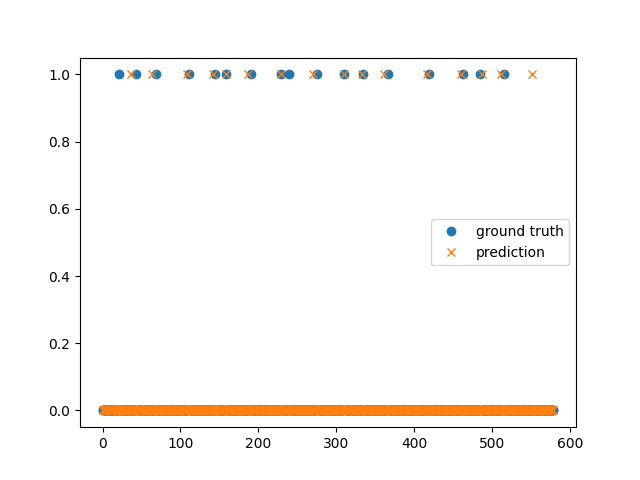

In [3]:

plot_shot_differences(Path("/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match10/shot/1_03_01_hit.csv"))

# Render the shot in 3d

In [3]:
# below is WIP copied from Paul's code. haven't run it through yet
def draw_rally(hit_id, ax):
    frame_id = [hit_frame[hit_id], hit_frame[hit_id+1]]
    # Get poses from frame
    # TTY, Yamaguchi
    player_heights = [1.8, 1.8]
    locations = []
    for j in range(2):
        xy = poses[(j+hit_id+1)%2].iloc[frame_id[j]].to_list()
        pose = Pose()
        pose.init_from_kparray(xy)

        mid_pt = pose.get_base()
        court_pt = court.pixel_to_court(mid_pt)
        court_pt = [court_pt[0] * 6.1, court_pt[1] * 13.4]

        img = cv2.imread('player.png', cv2.IMREAD_UNCHANGED)
        img[img > 0] = 1

        scale_percent = 10 # percent of original size
        width = int(img.shape[1] * scale_percent / 100)
        height = int(img.shape[0] * scale_percent / 100)
        dim = (width, height)

        x_vals = np.where(np.min(img[:,:,0], axis=0) == 0)[0]
        y_vals = np.where(np.min(img[:,:,0], axis=1) == 0)[0]

        x_to_y = (max(x_vals) - min(x_vals) + 1.) / (max(y_vals) - min(y_vals) + 1.)
        img = img[min(x_vals):max(x_vals)+1, min(y_vals):max(y_vals)+1, :]

        # resize image
        img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
        x0, z0 = np.mgrid[0:img.shape[0], 0:img.shape[1]]

        # Rescale to proportions of average human
        if hit_id % 2:
            sgn = 1 if j == 1 else -1
        else:
            sgn = -1 if j == 1 else 1
        x, z = sgn * (z0 / img.shape[1]- 0.5) * player_heights[j] * x_to_y, player_heights[j] - x0 / img.shape[0] * player_heights[j]
        y = np.ones(x.shape) * court_pt[1]

        ax.plot_surface(x + court_pt[0], court_pt[1], z, rstride=5, cstride=5,
                        facecolors=img)

        locations.append(court_pt)
    return locations

# Visualize the 3d trajectory in one rally

In [1]:
%matplotlib widget

In [9]:
from ai_badminton.hit_detector import read_hits

from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from pathlib import Path

[[-999. -999. -999.]
 [ 999.  999.  999.]]
[-999. -999. -999.] [ 0.          1.80687148 -9.06053558]
new_dims =  [[ 0.          1.80687148 -9.06053558]
 [ 6.47993871 17.65886016  5.02543773]]
dims =  [[ 0.          1.80687148 -9.06053558]
 [ 6.47993871 17.65886016  5.02543773]]
[ 0.          1.80687148 -9.06053558] [  1.0821471   -1.20446128 -15.8421219 ]
new_dims =  [[  1.0821471   -1.20446128 -15.8421219 ]
 [  5.163935    25.97203471   8.19199741]]
dims =  [[ 1.0821471   1.80687148 -9.06053558]
 [ 5.163935   17.65886016  5.02543773]]
[ 1.0821471   1.80687148 -9.06053558] [-0.69819619 -5.42435283 -9.54549839]
new_dims =  [[-0.69819619 -5.42435283 -9.54549839]
 [ 5.04395203 30.12088473  5.27203071]]
dims =  [[ 1.0821471   1.80687148 -9.06053558]
 [ 5.04395203 17.65886016  5.02543773]]
[ 1.0821471   1.80687148 -9.06053558] [ 1.23219482e-15  2.52505173e+00 -8.93146475e+00]
new_dims =  [[ 1.23219482e-15  2.52505173e+00 -8.93146475e+00]
 [ 6.32701847e+00  2.41354851e+01  5.15604688e+00]]
d

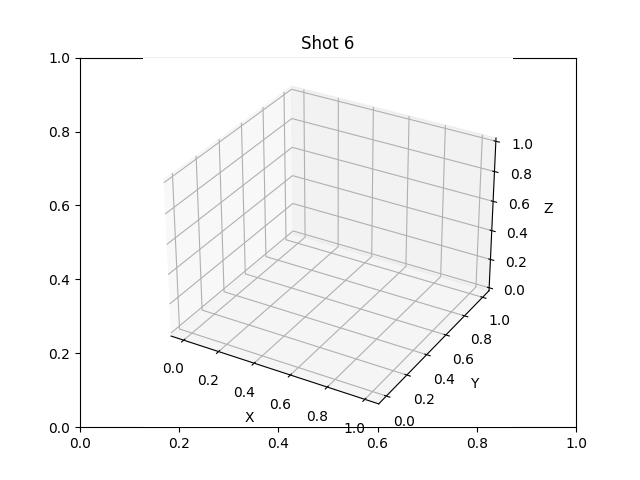

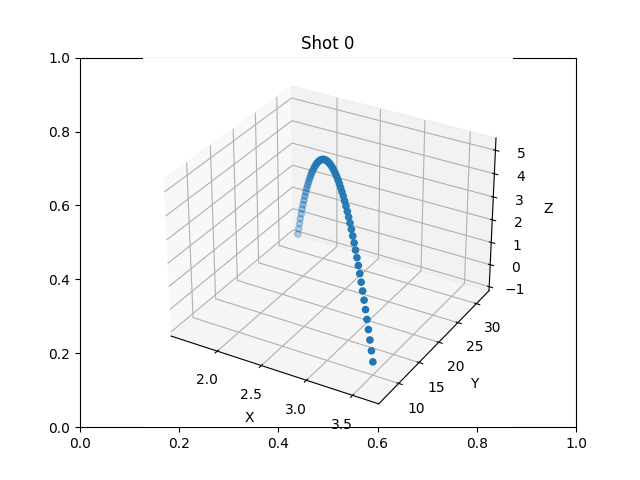

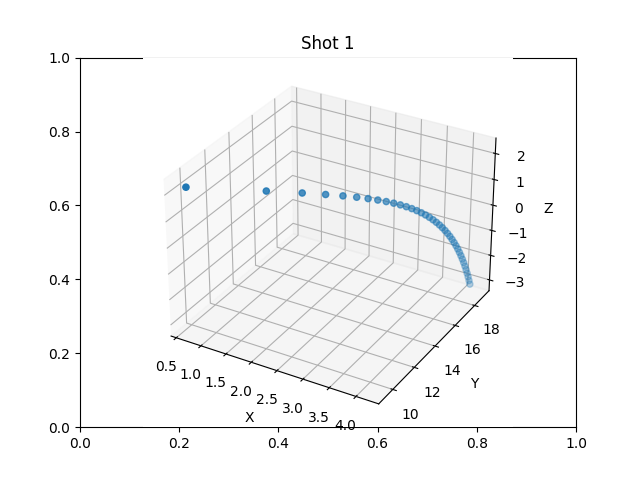

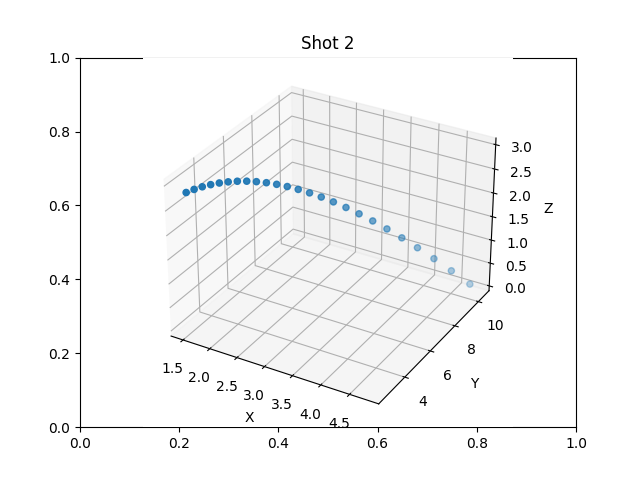

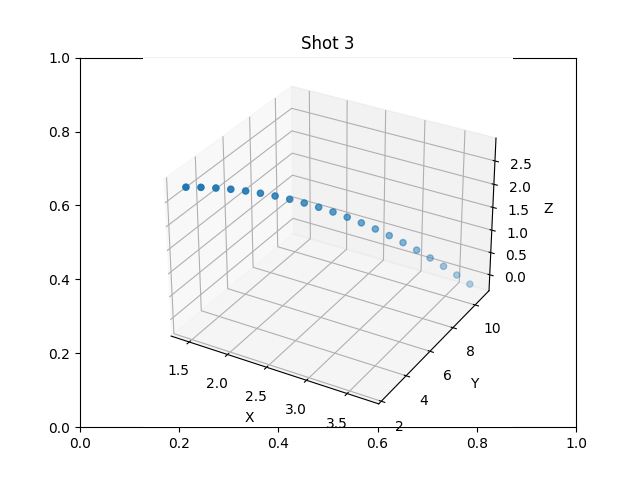

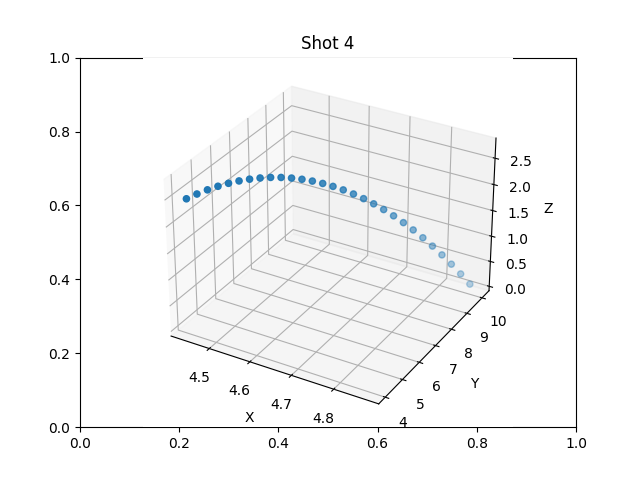

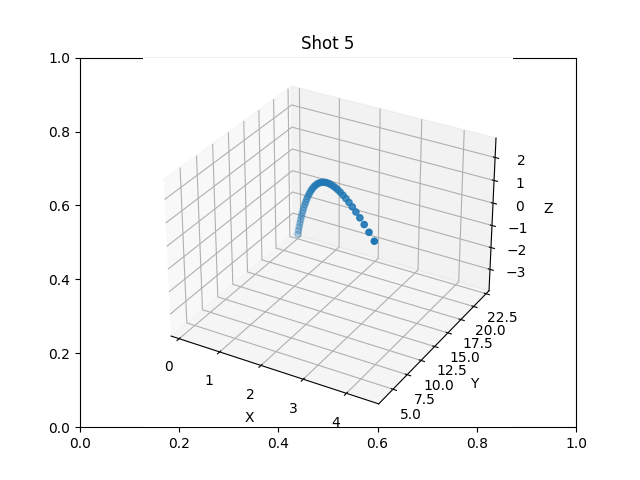

In [27]:
match_path = Path("/sensei-fs/users/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match2")

# calculating the dims
rally_path = match_path / "rally_video"
video_paths = sorted(rally_path.glob("*.mp4"))
video_names = [x.stem for x in video_paths]

dims = np.array([[-999.0,-999.0,-999.0], [999.0,999.0,999.0]])
print(dims)
for video_name in video_names:
    trajectory_path = match_path / "ball_trajectory_3d" / (video_name + "_3d.csv")
    trajectory = pd.read_csv(str(trajectory_path))
    pos3d = trajectory.values[:,1:4]
    new_dims = np.array([np.min(pos3d, axis=0), np.max(pos3d, axis=0)])
    print(dims[0,:], new_dims[0,:])
    dims[0,:] = np.maximum(new_dims[0,:], dims[0,:])
    dims[1,:] = np.minimum(new_dims[1,:], dims[1,:])

    print("new_dims = ", new_dims)
    print("dims = ", dims)

    

trajectory_path = match_path / "ball_trajectory_3d" / "1_08_11_3d.csv"
hit_path = match_path / "shot" / "1_08_11_hit_predict.csv"

assert trajectory_path.is_file()
assert hit_path.is_file()

hits = read_hits(hit_path)

trajectory = pd.read_csv(str(trajectory_path))
pos3d = trajectory.values[:,1:4]
dims = [np.min(pos3d, axis=0), np.max(pos3d, axis=0)]
print(dims)

for idx, f in enumerate(hits["frames"]):
    if idx != len(hits["frames"])-1:
        fp = hits["frames"][idx+1]
    else:
        fp = len(hits["frames"])-1    
    fig = plt.figure()
    plt.title(f"Shot {idx}")
    ax = plt.axes(projection='3d')
    ax.scatter3D(pos3d[f:fp,0], pos3d[f:fp,1], pos3d[f:fp,2])
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")

plt.show()

# Render 3D shots

reading rally 1_08_08


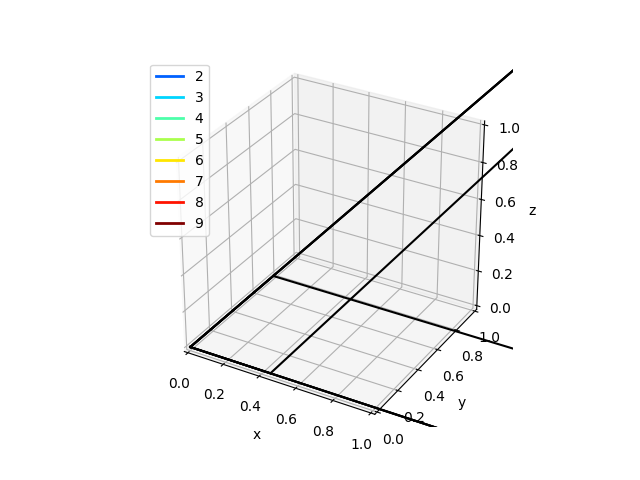

In [45]:
%matplotlib widget
from ai_badminton.trajectory import read_trajectory_3d
from ai_badminton.hit_detector import read_hits

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from mpl_toolkits import mplot3d
import mpl_toolkits.mplot3d.art3d as art3d


import numpy as np

from pathlib import Path

def draw_box_helper(ax, box = [[0, 0], [6.1, 13.41]]):

    x_low = box[0][0]
    y_low = box[0][1]

    x_top = box[1][0]
    y_top = box[1][1]

    ax.plot( [x_low, x_low], [y_low, y_top], [0, 0], color="k")
    ax.plot( [x_low, x_top], [y_low, y_low], [0, 0], color="k")
    ax.plot( [x_top, x_top], [y_low, y_top], [0, 0], color="k")
    ax.plot( [x_low, x_top], [y_top, y_top], [0, 0], color="k")


def draw_court_lines_and_net_3d(ax):
    draw_box_helper(ax, box=[[0, 0], [6.1, 13.41]])
    draw_box_helper(ax, box=[[0, 0], [6.1/2.0, 3.96+0.76]])
    draw_box_helper(ax, box=[[6.1/2.0, 0], [6.1, 3.96+0.76]])
    draw_box_helper(ax, box=[[0, 6.71+1.98], [6.1/2.0, 13.41]])
    draw_box_helper(ax, box=[[6.1/2.0, 6.71+1.98], [6.1, 13.41]])
    draw_box_helper(ax, box=[[0, 0], [0.45, 13.41]])
    draw_box_helper(ax, box=[[6.1-0.45, 0], [6.1-0.45, 13.41]])
    draw_box_helper(ax, box=[[0, 0], [6.1, 0.76]])
    draw_box_helper(ax, box=[[0, 13.41-0.76], [6.1, 13.41]])
    
    # drawing the net
    ax.plot( [0,0], [13.41/2,13.41/2], [0, 1.55], color="k" )
    ax.plot( [6.1,6.1], [13.41/2,13.41/2], [0, 1.55], color="k" )   
    box = Rectangle((0.0, 0.76), width=6.1, height=1.55-0.76, color="gray", alpha=0.5)
    ax.add_patch(box)
    art3d.pathpatch_2d_to_3d(box, z=13.41/2, zdir="y")


def axisEqual3D(ax):
    extents = np.array([getattr(ax, 'get_{}lim'.format(dim))() for dim in 'xyz'])
    sz = extents[:,1] - extents[:,0]
    centers = np.mean(extents, axis=1)
    maxsize = max(abs(sz))
    r = maxsize/2
    for ctr, dim in zip(centers, 'xyz'):
        getattr(ax, 'set_{}lim'.format(dim))(ctr - r, ctr + r)

def is_trajectory_below_ground(traj):
    return (traj[:, 2] < 0).any()

def is_valid_trajectory(traj):
    return not (traj == -1.0).all() #and not is_trajectory_below_ground(traj) #FIXME debug

dataset_root = Path("/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset")

match_path = dataset_root / "test_match3"

rallies = [x.stem for x in sorted((match_path / "rally_video").glob("*.mp4"))]
rallies = ["1_08_08"]

fig = plt.figure()
ax = plt.axes(projection="3d")
ax.set_box_aspect(aspect = (1,1,1))
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
axisEqual3D(ax)
for rally in rallies:

    print(f"reading rally {rally}")

    trajectory3d = read_trajectory_3d(str(match_path / "ball_trajectory_3d_bootstraped" / (rally + "_3d.csv"))).values[:, 1:]
    hits = read_hits(match_path / "shot" / (rally + "_hit.csv"))

    ids = hits["player_ids"]
    frames = hits["frames"]
    assert len(frames) == len(ids)

    N = len(frames)

    trajectories = []

    trajectories.append(trajectory3d[:frames[0], :])
    for ii in range(N-1):
        trajectories.append(trajectory3d[frames[ii]:frames[ii+1], :])
    if frames[-1] != len(trajectory3d):
        trajectories.append(trajectory3d[frames[-1]:, :])

    #trajectories = trajectories[:8]
    colors = plt.cm.jet(np.linspace(0,1,len(trajectories)))
    for idx, traj in enumerate(trajectories):
        if is_valid_trajectory(traj):
            ax.plot3D(
                traj[:,0],
                traj[:,1],
                traj[:,2],
                linewidth=2,
                color=colors[idx],
                label=idx
            )
    plt.legend()
    draw_court_lines_and_net_3d(ax)

plt.show()

# Draw specific frames

Rendering frame 96


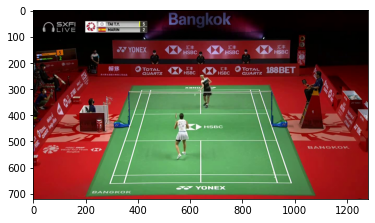

Rendering frame 159


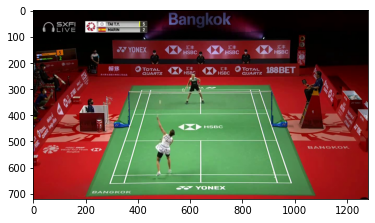

Rendering frame 172


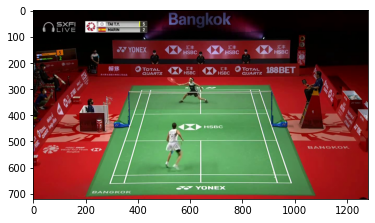

In [1]:
from ai_badminton.video_utils import *
from pathlib import Path
from matplotlib import pyplot as plt

video_path = "/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/test_match3/rally_video/1_05_03.mp4"

cap = read_video_assert(video_path)

render_frame_list = [
    96,
    159,
    172
]

for frame in render_frame_list:
    print(f"Rendering frame {frame}")
    ret, frame = read_frame(frame, cap, True)
    plt.imshow(frame)
    plt.show()

    